In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy

import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

776

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 2 of Set 1 | oktyabrskiy
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | belluru
Processing Record 5 of Set 1 | kristinehamn
Processing Record 6 of Set 1 | bokoro
Processing Record 7 of Set 1 | marsa matruh
Processing Record 8 of Set 1 | amboise
Processing Record 9 of Set 1 | popondetta
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | khonuu
City not found. Skipping...
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | santa maria del monte
Processing Record 21 of Set 1 |

Processing Record 41 of Set 4 | butterworth
Processing Record 42 of Set 4 | san cristobal
Processing Record 43 of Set 4 | rio blanco
Processing Record 44 of Set 4 | riyadh
Processing Record 45 of Set 4 | alyangula
Processing Record 46 of Set 4 | voh
Processing Record 47 of Set 4 | touros
Processing Record 48 of Set 4 | parainen
Processing Record 49 of Set 4 | komsomolskiy
Processing Record 50 of Set 4 | stokmarknes
Processing Record 1 of Set 5 | severnyy
Processing Record 2 of Set 5 | haines junction
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | milkovo
Processing Record 5 of Set 5 | grand-santi
Processing Record 6 of Set 5 | bom conselho
Processing Record 7 of Set 5 | sucre
Processing Record 8 of Set 5 | presidente epitacio
Processing Record 9 of Set 5 | gamba
Processing Record 10 of Set 5 | willowmore
Processing Record 11 of Set 5 | murray
Processing Record 12 of Set 5 | claresholm
Processing Record 13 of Set 5 | niceville
Processing Record 14 of Set 5 | 

Processing Record 32 of Set 8 | itarema
Processing Record 33 of Set 8 | malwan
City not found. Skipping...
Processing Record 34 of Set 8 | methana
Processing Record 35 of Set 8 | teya
Processing Record 36 of Set 8 | mrirt
City not found. Skipping...
Processing Record 37 of Set 8 | carnarvon
Processing Record 38 of Set 8 | domoni
Processing Record 39 of Set 8 | puerto baquerizo moreno
Processing Record 40 of Set 8 | saint-georges
Processing Record 41 of Set 8 | pochutla
Processing Record 42 of Set 8 | chapais
Processing Record 43 of Set 8 | kangaatsiaq
Processing Record 44 of Set 8 | emmen
Processing Record 45 of Set 8 | fereydun kenar
Processing Record 46 of Set 8 | peachland
Processing Record 47 of Set 8 | ilulissat
Processing Record 48 of Set 8 | skiros
City not found. Skipping...
Processing Record 49 of Set 8 | kenai
Processing Record 50 of Set 8 | neos marmaras
Processing Record 1 of Set 9 | sao jose da coroa grande
Processing Record 2 of Set 9 | strathmore
Processing Record 3 of S

Processing Record 19 of Set 12 | miri
Processing Record 20 of Set 12 | los llanos de aridane
Processing Record 21 of Set 12 | lakes entrance
Processing Record 22 of Set 12 | tessalit
Processing Record 23 of Set 12 | kaitangata
Processing Record 24 of Set 12 | varkaus
Processing Record 25 of Set 12 | sivas
Processing Record 26 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 27 of Set 12 | amherst center
Processing Record 28 of Set 12 | benton harbor
Processing Record 29 of Set 12 | norman
Processing Record 30 of Set 12 | arua
Processing Record 31 of Set 12 | viedma
Processing Record 32 of Set 12 | xinzhi
Processing Record 33 of Set 12 | lima
Processing Record 34 of Set 12 | ahipara
Processing Record 35 of Set 12 | warwick
Processing Record 36 of Set 12 | grado
Processing Record 37 of Set 12 | araripe
Processing Record 38 of Set 12 | nisia floresta
Processing Record 39 of Set 12 | abonnema
Processing Record 40 of Set 12 | paucartambo
City not found. Skipping...
P

Processing Record 4 of Set 16 | rocha
Processing Record 5 of Set 16 | whitianga
Processing Record 6 of Set 16 | birnin kebbi
Processing Record 7 of Set 16 | waipawa
Processing Record 8 of Set 16 | chima
Processing Record 9 of Set 16 | marzuq
Processing Record 10 of Set 16 | lloydminster
Processing Record 11 of Set 16 | linchuan
City not found. Skipping...
Processing Record 12 of Set 16 | lomovka
Processing Record 13 of Set 16 | kaeo
Processing Record 14 of Set 16 | homa bay
Processing Record 15 of Set 16 | voyskovitsy
Processing Record 16 of Set 16 | sanming
Processing Record 17 of Set 16 | comacchio
Processing Record 18 of Set 16 | kulhudhuffushi
Processing Record 19 of Set 16 | camapua
Processing Record 20 of Set 16 | walvis bay
Processing Record 21 of Set 16 | reichenbach
Processing Record 22 of Set 16 | ossora
Processing Record 23 of Set 16 | sibu
Processing Record 24 of Set 16 | bulungu
Processing Record 25 of Set 16 | smithers
Processing Record 26 of Set 16 | azimur
City not foun

In [8]:
len(city_data)

720

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oktyabrskiy,54.4815,53.4710,41.45,95,100,10.04,RU,2022-04-09 22:57:54
1,Provideniya,64.3833,-173.3000,33.01,96,100,16.55,RU,2022-04-09 22:57:54
2,Belluru,12.9911,76.7444,74.86,68,100,5.26,IN,2022-04-09 22:57:55
3,Kristinehamn,59.3098,14.1081,36.16,84,91,7.56,SE,2022-04-09 22:57:55
4,Bokoro,12.3807,17.0568,88.50,15,56,9.08,TD,2022-04-09 22:57:55
5,Marsa Matruh,31.3525,27.2453,59.20,88,0,3.44,EG,2022-04-09 22:57:56
6,Amboise,47.4125,0.9827,39.74,89,0,3.44,FR,2022-04-09 22:57:56
7,Popondetta,-8.7537,148.2534,79.47,89,96,0.22,PG,2022-04-09 22:57:56
8,Constitucion,-35.3333,-72.4167,54.66,88,4,4.56,CL,2022-04-09 22:57:25
9,Atuona,-9.8000,-139.0333,79.21,80,17,21.79,PF,2022-04-09 22:57:57


In [10]:
#Reorder the DF columns
new_column_order = ["City","Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

# Rearrange the column order in the DF
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oktyabrskiy,RU,2022-04-09 22:57:54,54.4815,53.4710,41.45,95,100,10.04
1,Provideniya,RU,2022-04-09 22:57:54,64.3833,-173.3000,33.01,96,100,16.55
2,Belluru,IN,2022-04-09 22:57:55,12.9911,76.7444,74.86,68,100,5.26
3,Kristinehamn,SE,2022-04-09 22:57:55,59.3098,14.1081,36.16,84,91,7.56
4,Bokoro,TD,2022-04-09 22:57:55,12.3807,17.0568,88.50,15,56,9.08
5,Marsa Matruh,EG,2022-04-09 22:57:56,31.3525,27.2453,59.20,88,0,3.44
6,Amboise,FR,2022-04-09 22:57:56,47.4125,0.9827,39.74,89,0,3.44
7,Popondetta,PG,2022-04-09 22:57:56,-8.7537,148.2534,79.47,89,96,0.22
8,Constitucion,CL,2022-04-09 22:57:25,-35.3333,-72.4167,54.66,88,4,4.56
9,Atuona,PF,2022-04-09 22:57:57,-9.8000,-139.0333,79.21,80,17,21.79


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

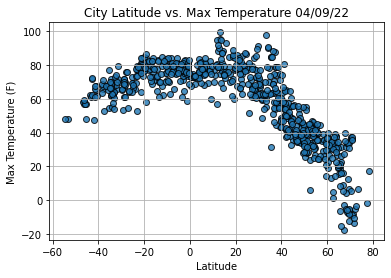

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_Vs_Max_Temp.png")

# Show plot.
plt.show()

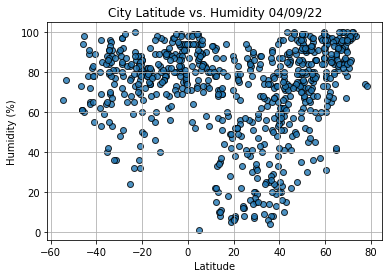

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_VS_Humidity.png")
# Show plot.
plt.show()

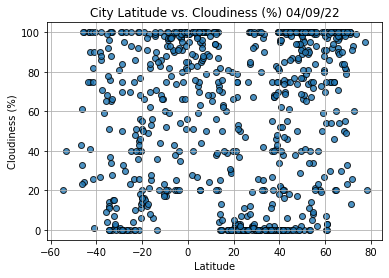

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_VS_Cloudiness.png")
# Show plot.
plt.show()

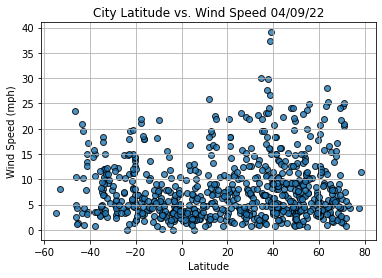

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_VS_Wind_Speed.png")
# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City              Bambous Virieux
Country                        MU
Date          2022-04-09 22:51:23
Lat                      -20.3428
Lng                       57.7575
Max Temp                    77.25
Humidity                       88
Cloudiness                     40
Wind Speed                   6.91
Name: 13, dtype: object

In [19]:
# Find Lat/Lng greater than zero (For northern hemisphere)
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oktyabrskiy,RU,2022-04-09 22:57:54,54.4815,53.4710,41.45,95,100,10.04
1,Provideniya,RU,2022-04-09 22:57:54,64.3833,-173.3000,33.01,96,100,16.55
2,Belluru,IN,2022-04-09 22:57:55,12.9911,76.7444,74.86,68,100,5.26
3,Kristinehamn,SE,2022-04-09 22:57:55,59.3098,14.1081,36.16,84,91,7.56
4,Bokoro,TD,2022-04-09 22:57:55,12.3807,17.0568,88.50,15,56,9.08


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,10))

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title("Linear Regression on Northern Hemisphere for Maximum Temperature")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (F)')
    plt.show()

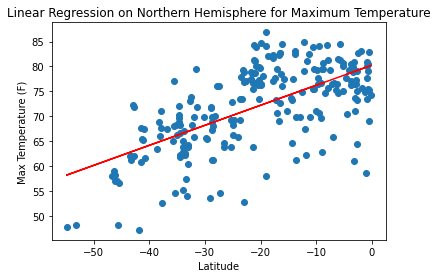

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title("Linear Regression on Southern Hemisphere for Maximum Temperature")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (F)')
    plt.show()

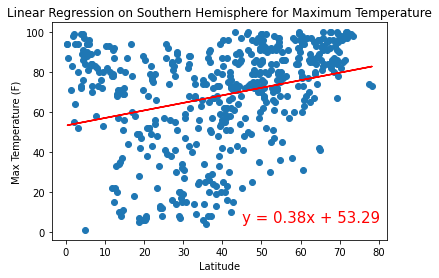

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,5))

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title("Linear Regression on Northern Hemisphere for % Humidity")
    plt.xlabel('Latitude')
    plt.ylabel('% Humidity')
    plt.show()

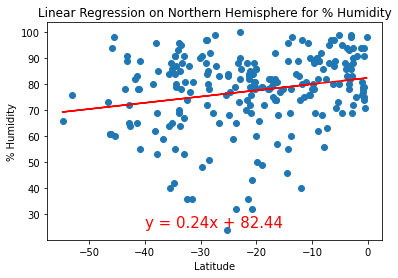

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40,25))

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title("Linear Regression on Southern Hemisphere for % Humidity")
    plt.xlabel('Latitude')
    plt.ylabel('% Humidity')
    plt.show()

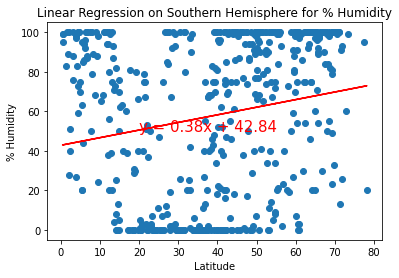

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,50))

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title("Linear Regression on Northern Hemisphere for % Cloudiness")
    plt.xlabel('Latitude')
    plt.ylabel('% Cloudiness')
    plt.show()

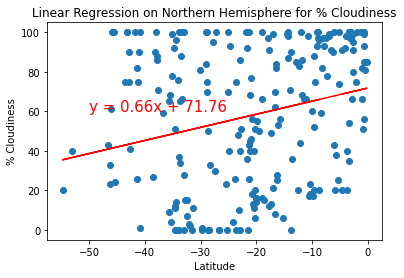

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title("Linear Regression on Southern Hemisphere for % Cloudiness")
    plt.xlabel('Latitude')
    plt.ylabel('% Cloudiness')
    plt.show()

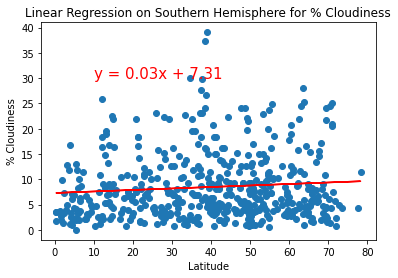

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,30))

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title("Linear Regression on Northern Hemisphere for Wind Speed")
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (mph)')
    plt.show()

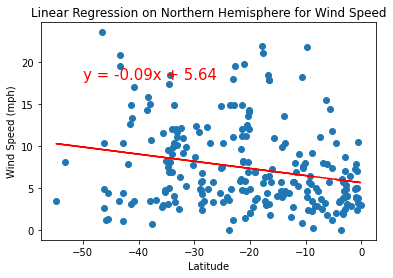

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,18))

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title("Linear Regression on Southern Hemisphere for Wind Speed")
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (mph)')
    plt.show()